Kolom dalam dataset:
Index(['Brand_Name', 'How_Many_Sold', 'Current_Price', 'Product_details',
       'RATING'],
      dtype='object')

Ringkasan Struktur Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23940 entries, 0 to 23939
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand_Name       23940 non-null  object 
 1   How_Many_Sold    23940 non-null  int64  
 2   Current_Price    23940 non-null  float64
 3   Product_details  23940 non-null  object 
 4   RATING           23940 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 935.3+ KB
None

Statistik Deskriptif:
       How_Many_Sold  Current_Price        RATING
count   23940.000000   23940.000000  23940.000000
mean     3497.083333     840.066667      3.836667
std     10730.328075     381.192458      0.410686
min         2.000000     231.000000      2.400000
25%       171.000000     589.500000      3.600000
50%       406.500

C:\Users\user\AppData\Local\Temp\ipykernel_7212\3483091807.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Current_Price'].fillna(df['Current_Price'].median(), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_7212\3483091807.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

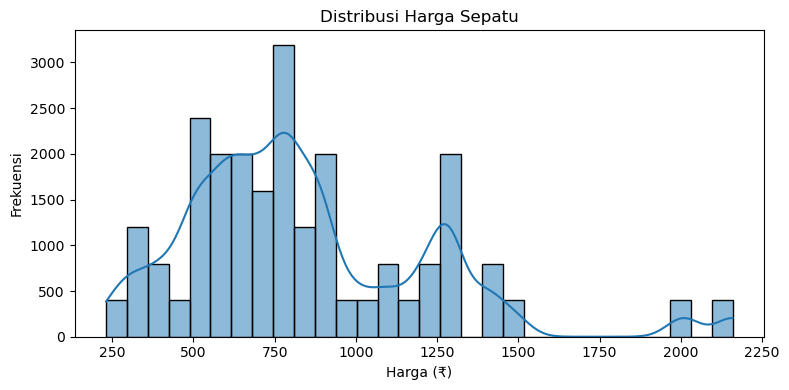

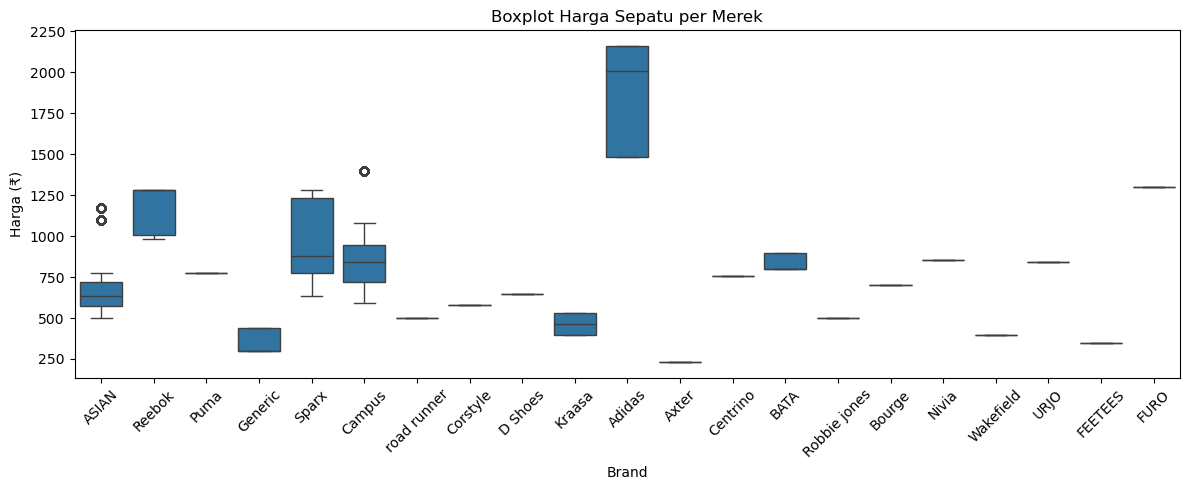

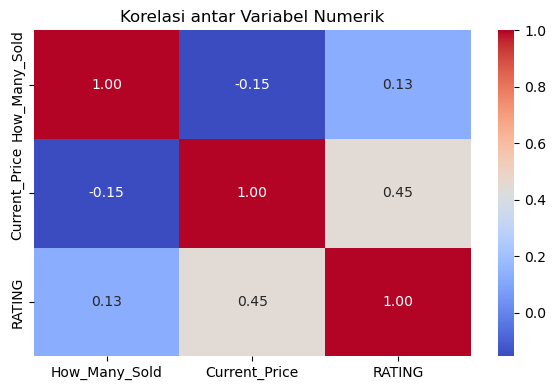

In [13]:
# === TAHAP 1: SELEKSI DATASET DAN EDA ===

# 1. Import Pustaka
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load Data
df = pd.read_csv("D:\\semester 4\\MP ML\\UAS\\MEN_SHOES.csv")  # Gunakan file yang sudah diupload

# 3. Tampilkan Nama Kolom
print("Kolom dalam dataset:")
print(df.columns)

# 4. Bersihkan Kolom Numerik

# -> How_Many_Sold: hapus koma, konversi ke int
df['How_Many_Sold'] = df['How_Many_Sold'].replace(',', '', regex=True)
df['How_Many_Sold'] = pd.to_numeric(df['How_Many_Sold'], errors='coerce')  # bisa NaN, aman

# -> Current_Price: hapus simbol ₹ dan koma, konversi ke float (sementara), isi NaN dengan median
df['Current_Price'] = df['Current_Price'].replace('[₹,]', '', regex=True)
df['Current_Price'] = pd.to_numeric(df['Current_Price'], errors='coerce')
df['Current_Price'].fillna(df['Current_Price'].median(), inplace=True)

# -> RATING: ubah ke float, isi NaN dengan median (jika mau dipakai untuk korelasi)
df['RATING'] = pd.to_numeric(df['RATING'], errors='coerce')
df['RATING'].fillna(df['RATING'].median(), inplace=True)

# 5. Info dan Statistik
print("\nRingkasan Struktur Data:")
print(df.info())

print("\nStatistik Deskriptif:")
print(df.describe())

# 6. Visualisasi 1: Histogram Harga
plt.figure(figsize=(8, 4))
sns.histplot(df['Current_Price'], bins=30, kde=True)
plt.title("Distribusi Harga Sepatu")
plt.xlabel("Harga (₹)")
plt.ylabel("Frekuensi")
plt.tight_layout()
plt.show()

# 7. Visualisasi 2: Boxplot Harga per Merek
plt.figure(figsize=(12, 5))
sns.boxplot(x='Brand_Name', y='Current_Price', data=df)
plt.title("Boxplot Harga Sepatu per Merek")
plt.xlabel("Brand")
plt.ylabel("Harga (₹)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 8. Visualisasi 3: Heatmap Korelasi Numerik
df_num = df[['How_Many_Sold', 'Current_Price', 'RATING']].dropna()
plt.figure(figsize=(6, 4))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi antar Variabel Numerik")
plt.tight_layout()
plt.show()


In [14]:
# === TAHAP 2: DATA PREPROCESSING DAN SPLIT DATASET ===

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# 1. Buat target: rating >= 4.0 → target = 1 (baik), else 0
df['target'] = (df['RATING'] >= 4.0).astype(int)

# 2. Pilih fitur (X) dan target (y)
X = df[['Brand_Name', 'Current_Price', 'How_Many_Sold']]
y = df['target']

# 3. Identifikasi fitur numerik dan kategorikal
numeric_features = ['Current_Price', 'How_Many_Sold']
categorical_features = ['Brand_Name']

# 4. Pipeline untuk data numerik: isi nilai kosong + scaling
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# 5. Pipeline untuk data kategorikal: isi nilai kosong + one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# 6. Gabungkan pipeline ke dalam ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 7. Split data menjadi train dan test (stratify agar proporsi target seimbang)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# 8. Lihat hasil
print("Jumlah data train:", X_train.shape[0])
print("Jumlah data test:", X_test.shape[0])
print("\nProporsi label di training set:")
print(y_train.value_counts(normalize=True))
print("\nProporsi label di testing set:")
print(y_test.value_counts(normalize=True))


Jumlah data train: 19152
Jumlah data test: 4788

Proporsi label di training set:
target
1    0.583333
0    0.416667
Name: proportion, dtype: float64

Proporsi label di testing set:
target
1    0.583333
0    0.416667
Name: proportion, dtype: float64



🔁 Evaluasi: Logistic Regression

🔁 Evaluasi: Random Forest

🔁 Evaluasi: Support Vector Machine

✅ Logistic Regression
  - Akurasi: 0.8492
  - F1 Score: 0.8487
  - CV Mean: 0.8502 (±0.0034)
  - Best Params: {'classifier__C': 0.1}

✅ Random Forest
  - Akurasi: 1.0000
  - F1 Score: 1.0000
  - CV Mean: 1.0000 (±0.0000)
  - Best Params: {'classifier__max_depth': 20, 'classifier__n_estimators': 50}

✅ Support Vector Machine
  - Akurasi: 0.9672
  - F1 Score: 0.9672
  - CV Mean: 0.9665 (±0.0032)
  - Best Params: {'classifier__C': 10, 'classifier__kernel': 'rbf'}


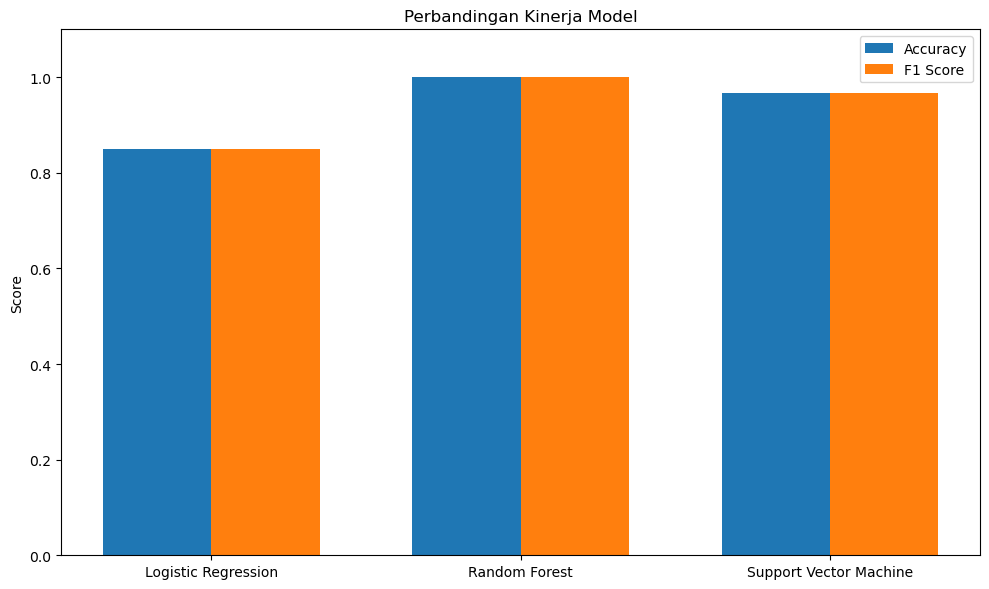

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

model_params = {
    "Logistic Regression": {
        'model': LogisticRegression(max_iter=1000),
        'params': {'classifier__C': [0.01, 0.1, 1, 10]}
    },
    "Random Forest": {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'classifier__n_estimators': [50, 100],
            'classifier__max_depth': [5, 10, 20]
        }
    },
    "Support Vector Machine": {
        'model': SVC(),
        'params': {
            'classifier__C': [0.1, 1, 10],
            'classifier__kernel': ['linear', 'rbf']
        }
    }
}


results = {}

for name, mp in model_params.items():
    print(f"\n🔁 Evaluasi: {name}")
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', mp['model'])
    ])

    grid = GridSearchCV(pipe, mp['params'], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1 = report['weighted avg']['f1-score']
    cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')

    results[name] = {
        'accuracy': acc,
        'f1_score': f1,
        'cv_mean': np.mean(cv_scores),
        'cv_std': np.std(cv_scores),
        'best_params': grid.best_params_,
        'pipeline': best_model  # ✅ Diperlukan untuk tahap 4
    }
for name, res in results.items():
    print(f"\n✅ {name}")
    print(f"  - Akurasi: {res['accuracy']:.4f}")
    print(f"  - F1 Score: {res['f1_score']:.4f}")
    print(f"  - CV Mean: {res['cv_mean']:.4f} (±{res['cv_std']:.4f})")
    print(f"  - Best Params: {res['best_params']}")
import matplotlib.pyplot as plt

# Ekstrak metrik untuk visualisasi
labels = list(results.keys())
accuracies = [results[k]['accuracy'] for k in labels]
f1_scores = [results[k]['f1_score'] for k in labels]

x = np.arange(len(labels))  # posisi x
width = 0.35  # lebar bar

# Buat visualisasi
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, accuracies, width, label='Accuracy')
plt.bar(x + width/2, f1_scores, width, label='F1 Score')

plt.xticks(x, labels)
plt.ylabel('Score')
plt.title('Perbandingan Kinerja Model')
plt.ylim(0, 1.1)
plt.legend()
plt.tight_layout()
plt.show()

In [16]:
# Tahap 4: Simpan Model Terbaik ke File .sav
import joblib

# Tambahkan pipeline ke dalam dictionary results saat training
# (Catatan: pastikan ini juga ditambahkan di tahap 3 training loop)
# results[name]['pipeline'] = best_model

# Temukan model dengan akurasi tertinggi
best_model_name = max(results, key=lambda name: results[name]['accuracy'])
best_model_pipeline = results[best_model_name]['pipeline']

# Simpan model terbaik ke file .sav
joblib.dump(best_model_pipeline, "best_shoe_model.sav")
print(f"Model terbaik ({best_model_name}) berhasil disimpan ke 'best_shoe_model.sav'")

Model terbaik (Random Forest) berhasil disimpan ke 'best_shoe_model.sav'
